In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import sympy as sym

In [2]:
def f(X, n, q, b, c):
    Z = np.zeros(len(X))
    for i in range(len(X)):
        for j in range(int(n)):
            for k in range(int(n)):
                Z[i] += q[j][k]*X[i][j]*X[i][k]
                
        for j in range(int(n)):
            Z[i] += b[j]*X[i][j]    
    return Z

In [3]:
def f_mesh(X, Y, q, b, c):
    Z = np.zeros(len(X))
    Z = q[0][0]*X*X + q[0][1]*X*Y + q[1][0]*Y*X + q[1][1]*Y*Y + b[0]*X + b[1]*Y + c
    return Z

In [4]:
def f2(X, Y, n, q, b, c):
    Z = q[0][0]*X*X + q[0][1]*X*Y + q[1][0]*Y*X + q[1][1]*Y*Y + b[0]*X + b[1]*Y + int(c[0])
    return Z

In [132]:
def gd_with_momentum(X_new, X1, Y1, Z1, n, q, b, c, alpha=0.10, beta=0.8, precision=0.0001, max_iter=200):
    X_old = np.zeros((1, 2))
    X_new = np.zeros((1, 2))
    dfr = np.zeros((1, 2))
    
    X_new[0][0] = 4.9
    X_new[0][1] = 4.9
    i = 0
    Xs = np.zeros((max_iter, 2))
    Ys = np.zeros(max_iter) 
    
    V = np.zeros((max_iter + 1, 2))

    x, y = sym.symbols('x y')
    df1 = sym.diff(f2(x, y, n, q, b, c), x)
    df2 = sym.diff(f2(x, y, n, q, b, c), y)

    while np.all(abs(X_new - X_old)) > precision and max_iter > i:
        Xs[i] = X_new
        Ys[i] = f2 (X_new[0][0], X_new[0][1], n, q, b, c)

        X_old = X_new
        
        dfr[0][0] = df1.evalf(subs={x: X_old[0][0], y: X_old[0][1]})
        dfr[0][1] = df2.evalf(subs={x: X_old[0][0], y: X_old[0][1]})
        
        i += 1
        V[i] = beta * V[i - 1] + (1 - beta) * dfr
        X_new = X_new - alpha * V[i]
        print("V: {}, dfr: {}, X_new: {}".format(V[i], dfr, X_new))
        
        alpha *= 0.99
        
    
    print("Finished with {} step".format(i))
    if (i < max_iter):
        Xs[i] = X_new
        Ys[i] = f2(X_new[0][0], X_new[0][1], n, q, b, c)

        for j in range(max_iter - 1, i, -1):
            Xs = np.delete(Xs, j, axis=0)
            Ys = np.delete(Ys, j, axis=0)
    return Xs, Ys
    

In [133]:
X1 = np.arange(-5, 5, 0.1)
Y1 = np.arange(-5, 5, 0.1)
Z1 = np.zeros(len(X1))

X_new = np.zeros((100,2))

for i in range(len(X1)):
    X_new[i][0] = X1[i]
    X_new[i][1] = Y1[i]
    
Z1 = f(X_new, n, q, b, c)

x_list, y_list = gd_with_momentum(X_new, X1, Y1, Z1, n, q, b, c)

V: [1.96 3.92], dfr: [[ 9.8 19.6]], X_new: [[4.704 4.508]]
V: [3.4496 6.7424], dfr: [[ 9.408 18.032]], X_new: [[4.3624896 3.8405024]]
V: [4.50467584 8.46632192], dfr: [[ 8.7249792 15.3620096]], X_new: [[3.92098632 3.01071819]]
V: [5.1721352  9.18163209], dfr: [[ 7.84197264 12.04287275]], X_new: [[3.41913456 2.11982535]]
V: [5.50536198 9.04116595], dfr: [[6.83826912 8.47930138]], X_new: [[2.89029168 1.25133455]]
V: [5.56040626 8.2340004 ], dfr: [[5.78058337 5.00533821]], X_new: [[2.36150258 0.46828931]]
V: [5.39292604 6.96183176], dfr: [[4.72300516 1.87315723]], X_new: [[ 1.8537693  -0.18715333]]
V: [5.05584855 5.41974274], dfr: [[ 3.7075386  -0.74861334]], X_new: [[ 1.38253118 -0.69230877]]
V: [4.59769131 3.78194718], dfr: [[ 2.76506235 -2.7692351 ]], X_new: [[ 0.95828165 -1.04128594]]
V: [4.06146571 2.19252899], dfr: [[ 1.9165633  -4.16514377]], X_new: [[ 0.58725975 -1.24157725]]
V: [3.48407647 0.76076139], dfr: [[ 1.1745195  -4.96630899]], X_new: [[ 0.27216612 -1.31037914]]
V: [ 2.89

V: [ 2.63426184e-07 -1.29569044e-08], dfr: [[ 2.24270297e-07 -8.91785352e-09]], X_new: [[ 1.08423884e-07 -2.04692079e-09]]
V: [ 2.54110501e-07 -1.20030602e-08], dfr: [[ 2.16847769e-07 -8.18768317e-09]], X_new: [[ 1.04879664e-07 -1.87950743e-09]]
V: [ 2.45240266e-07 -1.11060541e-08], dfr: [[ 2.09759327e-07 -7.51802971e-09]], X_new: [[ 1.01493366e-07 -1.72615413e-09]]
V: [ 2.36789559e-07 -1.02657666e-08], dfr: [[ 2.02986732e-07 -6.90461652e-09]], X_new: [[ 9.82564527e-08 -1.58582110e-09]]
V: [ 2.28734229e-07 -9.48127013e-09], dfr: [[ 1.96512905e-07 -6.34328439e-09]], X_new: [[ 9.51609236e-08 -1.45750822e-09]]
Finished with 200 step


In [62]:
n = input("Enter power of your function: ")
q = []
for i in range(int(n)):
    q.append(input("Enter the function's coefficient matrix q's row q[{}]: ".format(i)).split())
b = input("Enter the function's coefficient b matrix: ").split()
c = input("Enter the function's constant c: ")

for i in range(int(n)):
    q[i] = list(map(float, q[i]))
b = list(map(float, b))
c = list(map(float, c))

Enter power of your function: 2
Enter the function's coefficient matrix q's row q[0]: 1 0
Enter the function's coefficient matrix q's row q[1]: 0 2
Enter the function's coefficient b matrix: 0 0
Enter the function's constant c: 0


Text(0.5, 1.0, 'Minimizing function')

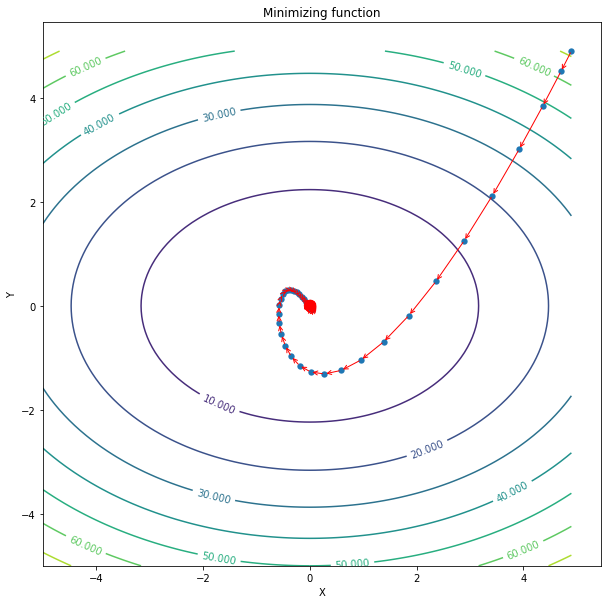

In [134]:
X1, Y1 = np.meshgrid(X1, Y1)
Z1 = f_mesh(X1, Y1, q, b, c)

X, Y = zip(*x_list)
Z = y_list

ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
cs = plt.contour(X1, Y1, Z1)
plt.clabel(cs, inline=1, fontsize=10)
colors = ['b', 'g', 'm', 'c', 'orange']
for j in range(1, len(X)):
    ax[1].annotate('', xy=(X[j], Y[j]), xytext=(X[j-1], Y[j-1]),
                arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                va='center', ha='center')
ax[1].scatter(X, Y, s=40, lw=0)
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].set_title('Minimizing function')                      

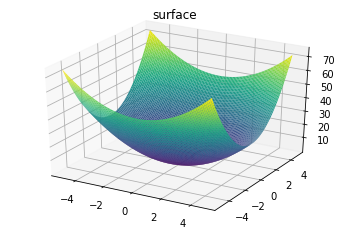

In [68]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X1, Y1, Z1, rstride=1, cstride=1, 
                cmap='viridis', edgecolor='none')
ax.set_title('surface')
plt.show()

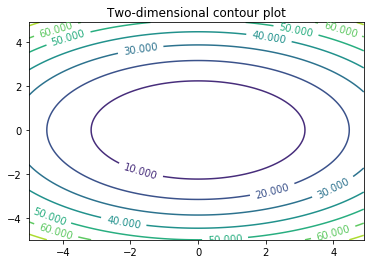

In [69]:
plt.figure()
cs = plt.contour(X1, Y1, Z1)
plt.clabel(cs, inline=1, fontsize=10)
plt.title('Two-dimensional contour plot')
plt.show()